In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/gurgaon_missing_values_removed.csv', on_bad_lines = 'skip')

In [ ]:
df = pd.read_csv('/content/gurgaon_missing_values_removed.csv', on_bad_lines = 'skip')
df.head()


,property_type,society,sector,price_in_cr,price_per_sqft,bedroom,bathroom,balcony,facing,agepossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,Shree Vardhman Victoria,Sector 70,1.78,9128,3,3,3+,north-east,Relatively New,1765,0,1,0,0,1,Semi-furnished,Average,Mid-rise
1,flat,Mapsko Mount Ville,Sector 79,1.30,8724,3,3,3,east,Relatively New,1176,0,0,1,0,0,Un-furnished,Medium,High-rise
2,house,Bhim Nagar Society,Sector 6,0.40,2500,4,2,3,east,Old,1600,0,0,0,0,0,Semi-furnished,Low,Low-rise
3,house,Madan Puri,Sector 7,0.75,12500,3,2,1,south-east,Moderately Old,600,0,0,0,0,0,Semi-furnished,Low,Low-rise
4,flat,DLF The Icon,Sector 43,5.25,20388,4,4,3,north,Old,2570,0,1,0,1,1,Semi-furnished,Medium,Mid-rise


In [ ]:
df.shape

(3639, 19)

In [ ]:
train_df = df.drop(columns = ['society','price_per_sqft']).copy()

train_df.head()

,property_type,sector,price_in_cr,bedroom,bathroom,balcony,facing,agepossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,Sector 70,1.78,3,3,3+,north-east,Relatively New,1765,0,1,0,0,1,Semi-furnished,Average,Mid-rise
1,flat,Sector 79,1.30,3,3,3,east,Relatively New,1176,0,0,1,0,0,Un-furnished,Medium,High-rise
2,house,Sector 6,0.40,4,2,3,east,Old,1600,0,0,0,0,0,Semi-furnished,Low,Low-rise
3,house,Sector 7,0.75,3,2,1,south-east,Moderately Old,600,0,0,0,0,0,Semi-furnished,Low,Low-rise
4,flat,Sector 43,5.25,4,4,3,north,Old,2570,0,1,0,1,1,Semi-furnished,Medium,Mid-rise


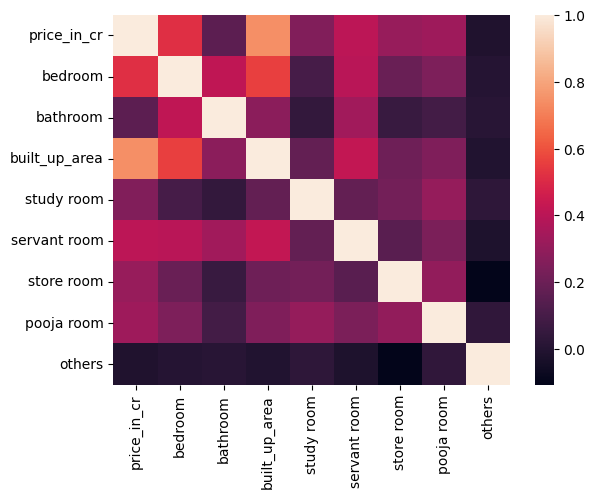

In [ ]:
sns.heatmap(train_df.corr(numeric_only = True))
plt.show()

In [ ]:
train_df.corr(numeric_only = True)['price_in_cr'][1:].sort_values(ascending = False)


,price_in_cr
built_up_area,0.741547
bedroom,0.519907
servant room,0.407430
pooja room,0.327278
store room,0.311466
study room,0.252994
bathroom,0.158576
others,-0.012417


In [ ]:
train_df = train_df.drop(columns = 'facing')
train_df.head()

,property_type,sector,price_in_cr,bedroom,bathroom,balcony,agepossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,Sector 70,1.78,3,3,3+,Relatively New,1765,0,1,0,0,1,Semi-furnished,Average,Mid-rise
1,flat,Sector 79,1.30,3,3,3,Relatively New,1176,0,0,1,0,0,Un-furnished,Medium,High-rise
2,house,Sector 6,0.40,4,2,3,Old,1600,0,0,0,0,0,Semi-furnished,Low,Low-rise
3,house,Sector 7,0.75,3,2,1,Moderately Old,600,0,0,0,0,0,Semi-furnished,Low,Low-rise
4,flat,Sector 43,5.25,4,4,3,Old,2570,0,1,0,1,1,Semi-furnished,Medium,Mid-rise


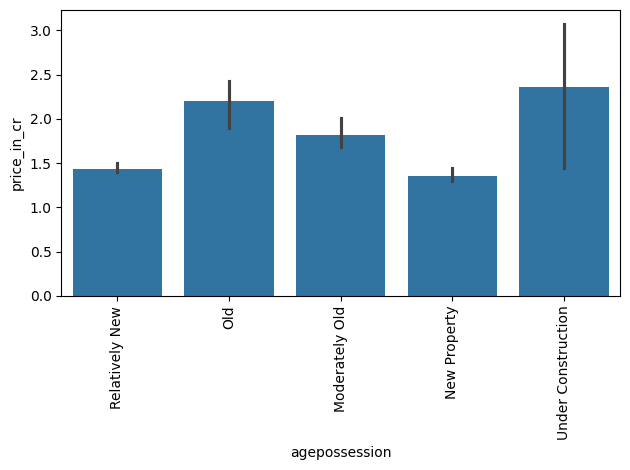

In [ ]:
sns.barplot(x = train_df['agepossession'], y = train_df['price_in_cr'], estimator = np.median)

plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


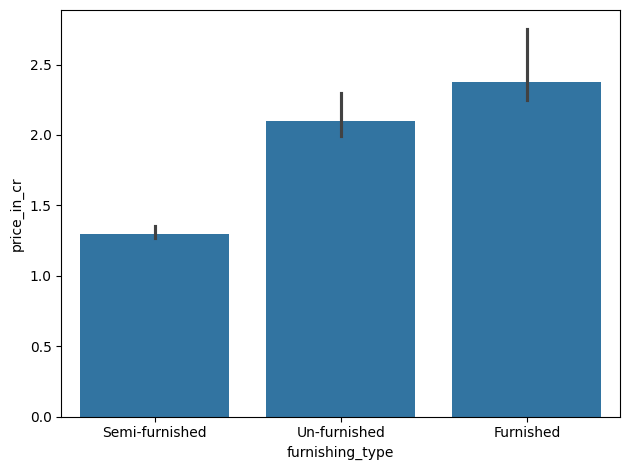

In [ ]:
sns.barplot(x = train_df['furnishing_type'], y = train_df['price_in_cr'], estimator=np.median)

plt.tight_layout()
plt.show()


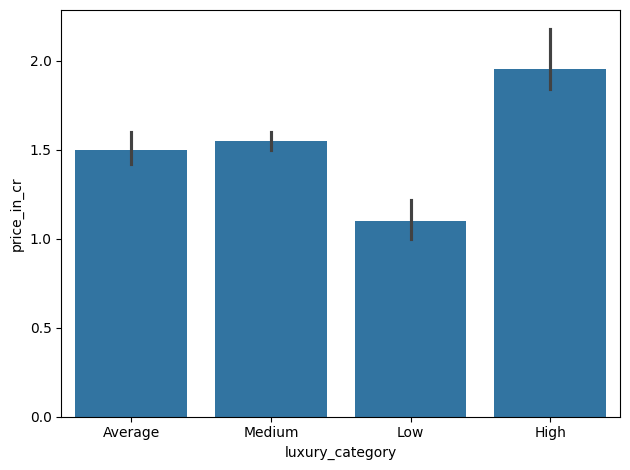

In [ ]:
sns.barplot(x = train_df['luxury_category'], y = train_df['price_in_cr'], estimator=np.median)

plt.tight_layout()
plt.show()


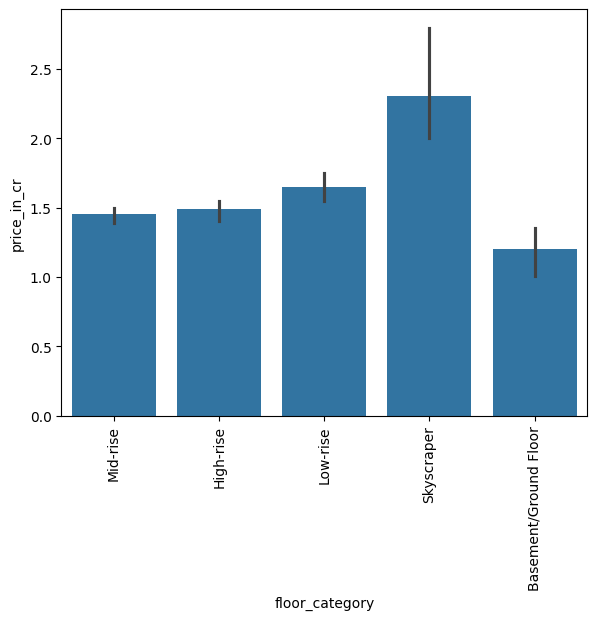

In [ ]:
sns.barplot(x = train_df['floor_category'], y = train_df['price_in_cr'], estimator=np.median)

plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()


In [ ]:
matrix = pd.pivot_table(train_df, index = 'sector', values = 'price_in_cr', aggfunc = 'mean')

matrix.sort_values(by = 'price_in_cr', ascending = True, inplace = True)


In [ ]:
l1 = ['flat', 'house']
l2 = matrix.index.tolist()
l3 = ['1', '0', '2', '3', '3+']
l4 = ['New Property', 'Relatively New', 'Moderately Old', 'Old','Under Construction']
l5 = ['Semi-furnished', 'Un-furnished', 'Furnished']
l6 = ['Low', 'Average', 'Medium', 'High']
l7 = ['Basement/Ground Floor', 'Mid-rise', 'High-rise', 'Low-rise', 'Skyscraper']

oe_categories = [l1,l2,l3,l4,l5,l6,l7]


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

oridnal_encoding = Pipeline(steps = [
    ('oridnal_encoding', OrdinalEncoder(categories = oe_categories, dtype = int, handle_unknown = 'use_encoded_value', unknown_value = -1))
])


In [ ]:
cols_for_oridinal_encoding = ['property_type','sector', 'balcony','agepossession', 'furnishing_type', 'luxury_category', 'floor_category']

trf_applied = [('ordinal', oridnal_encoding, cols_for_oridinal_encoding)]

trf = ColumnTransformer(transformers = trf_applied, remainder = 'passthrough' )


In [ ]:
data_labeled_encoded = train_df.copy().drop(columns = 'price_in_cr')

In [ ]:
X_label = trf.fit_transform(data_labeled_encoded)

In [ ]:
scale = StandardScaler()

X_label = pd.DataFrame(X_label, columns = trf.get_feature_names_out())

y_label = train_df['price_in_cr']


In [ ]:
X_label.head()

,ordinal__property_type,ordinal__sector,ordinal__balcony,ordinal__agepossession,ordinal__furnishing_type,ordinal__luxury_category,ordinal__floor_category,remainder__bedroom,remainder__bathroom,remainder__built_up_area,remainder__study room,remainder__servant room,remainder__store room,remainder__pooja room,remainder__others
0,0,67,4,1,0,1,1,3,3,1765,0,1,0,0,1
1,0,47,3,1,1,2,2,3,3,1176,0,0,1,0,0
2,1,13,3,3,0,0,3,4,2,1600,0,0,0,0,0
3,1,60,0,2,0,0,3,3,2,600,0,0,0,0,0
4,0,130,3,3,0,2,1,4,4,2570,0,1,0,1,1


In [ ]:
print(X_label.shape)
print(y_label.shape)

(3639, 15)
(3639,)


# Feature Selection

## Technique 1 - Random Forest Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 500)

rf.fit(X_label, y_label)

RandomForestRegressor(n_estimators=500)

In [ ]:
fi_df1 = pd.DataFrame(rf.feature_importances_, index = rf.feature_names_in_).reset_index()

fi_df1.rename(columns = {'index':'feature', 0:'rf_importance'}, inplace = True)

fi_df1.sort_values(by = 'rf_importance',ascending = False)


,feature,rf_importance
9,remainder__built_up_area,0.576969
1,ordinal__sector,0.265516
0,ordinal__property_type,0.037418
7,remainder__bedroom,0.019117
2,ordinal__balcony,0.017436
3,ordinal__agepossession,0.014606
11,remainder__servant room,0.011212
6,ordinal__floor_category,0.011151
8,remainder__bathroom,0.010514
5,ordinal__luxury_category,0.010028


## Technique 2 - Gradient Boosting Feature Importance

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = RandomForestRegressor(n_estimators = 500)

gb.fit(X_label, y_label)

RandomForestRegressor(n_estimators=500)

In [ ]:
fi_df2 = pd.DataFrame(gb.feature_importances_, index = gb.feature_names_in_).reset_index()

fi_df2.rename(columns = {'index':'feature', 0:'gb_importance'}, inplace = True)

fi_df2.sort_values(by = 'gb_importance',ascending = False)


,feature,gb_importance
9,remainder__built_up_area,0.576091
1,ordinal__sector,0.266132
0,ordinal__property_type,0.037312
7,remainder__bedroom,0.019015
2,ordinal__balcony,0.017947
3,ordinal__agepossession,0.014712
11,remainder__servant room,0.011117
6,ordinal__floor_category,0.010805
8,remainder__bathroom,0.010515
5,ordinal__luxury_category,0.009847


## Technique 3 - LASSO

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)

lasso.fit(X_label, y_label)

fi_df3  = pd.DataFrame(lasso.coef_, index = lasso.feature_names_in_).reset_index()

fi_df3.rename(columns = {'index':'feature', 0:'lasso_importance'}, inplace = True)

fi_df3.sort_values(by = 'lasso_importance',ascending = False)


,feature,lasso_importance
0,ordinal__property_type,1.009224
11,remainder__servant room,0.416075
10,remainder__study room,0.414355
12,remainder__store room,0.395239
7,remainder__bedroom,0.267818
13,remainder__pooja room,0.260064
4,ordinal__furnishing_type,0.104413
6,ordinal__floor_category,0.057842
5,ordinal__luxury_category,0.031397
1,ordinal__sector,0.020183


## Technique 4 - Ridge

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.01)

ridge.fit(X_label, y_label)

fi_df4  = pd.DataFrame(ridge.coef_, index = ridge.feature_names_in_).reset_index()

fi_df4.rename(columns = {'index':'feature', 0:'ridge_importance'}, inplace = True)

fi_df4.sort_values(by = 'ridge_importance', ascending = False)


,feature,ridge_importance
0,ordinal__property_type,1.070472
12,remainder__store room,0.474878
11,remainder__servant room,0.465793
10,remainder__study room,0.450602
13,remainder__pooja room,0.286330
7,remainder__bedroom,0.276922
4,ordinal__furnishing_type,0.127590
6,ordinal__floor_category,0.063936
5,ordinal__luxury_category,0.033404
1,ordinal__sector,0.019801


##Technique 5 -  Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df5 = pd.DataFrame({'feature': selected_features, 'rfe_score': selected_coefficients}).sort_values(by='rfe_score', ascending=False)

fi_df5


,feature,rfe_score
9,remainder__built_up_area,0.577947
1,ordinal__sector,0.263918
0,ordinal__property_type,0.036315
2,ordinal__balcony,0.019643
7,remainder__bedroom,0.018589
3,ordinal__agepossession,0.014073
6,ordinal__floor_category,0.011341
8,remainder__bathroom,0.011181
11,remainder__servant room,0.010753
5,ordinal__luxury_category,0.010193


## Technique 6 - Linear Regression Weights

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_label, y_label)

fi_df6 = pd.DataFrame({'feature': X_label.columns, 'linear_reg_coeffs': lin_reg.coef_}).sort_values(by='linear_reg_coeffs', ascending=False)

fi_df6


,feature,linear_reg_coeffs
0,ordinal__property_type,1.070500
12,remainder__store room,0.474889
11,remainder__servant room,0.465801
10,remainder__study room,0.450607
13,remainder__pooja room,0.286328
7,remainder__bedroom,0.276920
4,ordinal__furnishing_type,0.127590
6,ordinal__floor_category,0.063934
5,ordinal__luxury_category,0.033405
1,ordinal__sector,0.019801


In [ ]:
final_fi_df = fi_df1.merge(fi_df2, on ='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6, on = 'feature').set_index('feature')

final_fi_df


,rf_importance,gb_importance,lasso_importance,ridge_importance,rfe_score,linear_reg_coeffs
feature,,,,,,
ordinal__property_type,0.037418,0.037312,1.009224,1.070472,0.036315,1.070500
ordinal__sector,0.265516,0.266132,0.020183,0.019801,0.263918,0.019801
ordinal__balcony,0.017436,0.017947,-0.220227,-0.218065,0.019643,-0.218063
ordinal__agepossession,0.014606,0.014712,-0.145157,-0.164892,0.014073,-0.164895
ordinal__furnishing_type,0.007818,0.008047,0.104413,0.127590,0.007952,0.127590
ordinal__luxury_category,0.010028,0.009847,0.031397,0.033404,0.010193,0.033405
ordinal__floor_category,0.011151,0.010805,0.057842,0.063936,0.011341,0.063934
remainder__bedroom,0.019117,0.019015,0.267818,0.276922,0.018589,0.276920
remainder__bathroom,0.010514,0.010515,-0.167157,-0.185732,0.011181,-0.185731


In [ ]:
mean_fi_df = final_fi_df.mean(axis = 1).sort_values(ascending = False)

mean_fi_df

,0
feature,
ordinal__property_type,0.543540
remainder__built_up_area,0.289033
remainder__servant room,0.230125
remainder__store room,0.226092
remainder__study room,0.221956
remainder__bedroom,0.146397
ordinal__sector,0.142558
remainder__pooja room,0.142170
ordinal__furnishing_type,0.063902


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
kfold = KFold(n_splits = 5, shuffle = True)

In [ ]:
rf = RandomForestRegressor(n_estimators = 200)

scores = cross_val_score(rf, X_label, y_label, cv = kfold, scoring = 'r2')

print(' Accuracy of X_label_without_feature_selection:', scores.mean())

 Accuracy of X_label_without_feature_selection: 0.8442476037274247


In [ ]:
features = mean_fi_df[~(mean_fi_df < 0.01)].index.tolist()

features = features + ['ordinal__agepossession','remainder__bathroom','ordinal__balcony']

features.remove('remainder__pooja room')

X_label_imp_features = X_label[features]

In [ ]:
rf = RandomForestRegressor(n_estimators = 200)

scores = cross_val_score(rf, X_label_imp_features, y_label, cv = kfold, scoring = 'r2')

print('Accuracy of X_label_with_feature_selection:', scores.mean())


Accuracy of X_label_with_feature_selection: 0.8506968419432411


In [ ]:
train_df = pd.concat([X_label_imp_features, y_label],axis = 1)
train_df.head()

,ordinal__property_type,remainder__built_up_area,remainder__servant room,remainder__store room,remainder__study room,remainder__bedroom,ordinal__sector,ordinal__furnishing_type,ordinal__floor_category,ordinal__luxury_category,ordinal__agepossession,remainder__bathroom,ordinal__balcony,price_in_cr
0,0,1765,1,0,0,3,67,0,1,1,1,3,4,1.78
1,0,1176,0,1,0,3,47,1,2,2,1,3,3,1.30
2,1,1600,0,0,0,4,13,0,3,0,3,2,3,0.40
3,1,600,0,0,0,3,60,0,3,0,2,2,0,0.75
4,0,2570,1,0,0,4,130,0,1,2,3,4,3,5.25


In [ ]:
train_df.shape

(3639, 14)

In [ ]:
len(train_df.columns)

14

In [ ]:
len(data.columns)

19

In [ ]:
data.columns

Index(['property_type', 'society', 'sector', 'price_in_cr', 'price_per_sqft',
       'bedroom', 'bathroom', 'balcony', 'facing', 'agepossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_category',
       'floor_category'],
      dtype='object')

In [ ]:
train_df.columns

Index(['ordinal__property_type', 'remainder__built_up_area',
       'remainder__servant room', 'remainder__store room',
       'remainder__study room', 'remainder__bedroom', 'ordinal__sector',
       'ordinal__furnishing_type', 'ordinal__floor_category',
       'ordinal__luxury_category', 'ordinal__agepossession',
       'remainder__bathroom', 'ordinal__balcony', 'price_in_cr'],
      dtype='object')

In [ ]:
cols_to_drop = ['society','price_per_sqft','facing','pooja room','others']

data.drop(columns = cols_to_drop, inplace = True)

In [ ]:
cols = ['property_type', 'sector', 'built_up_area', 'agepossession', 'bedroom', 'bathroom', 'study room', 'servant room', 'store room', 'balcony', 'furnishing_type',
        'luxury_category', 'floor_category', 'price_in_cr']

data = data[cols]

In [ ]:
data = data.sample(data.shape[0], random_state = 42, ignore_index = True)

data.head()

,property_type,sector,built_up_area,agepossession,bedroom,bathroom,study room,servant room,store room,balcony,furnishing_type,luxury_category,floor_category,price_in_cr
0,flat,Manesar,2233,Moderately Old,4,4,0,0,0,3,Semi-furnished,Low,Mid-rise,0.90
1,house,Sector 48,3229,Moderately Old,4,2,1,1,1,1,Un-furnished,Medium,Low-rise,7.35
2,house,Sector 10A,2367,Moderately Old,4,3,0,0,0,2,Semi-furnished,Low,Low-rise,4.25
3,flat,Sector 81,1300,Relatively New,2,2,0,0,0,3,Semi-furnished,Medium,Mid-rise,0.87
4,flat,Sector 88A,1582,New Property,3,3,0,0,0,3+,Semi-furnished,Medium,High-rise,2.65


In [ ]:
data.to_csv('gurgaon_post_feature_selection.csv',index = False)

# Creating Baseline Model

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

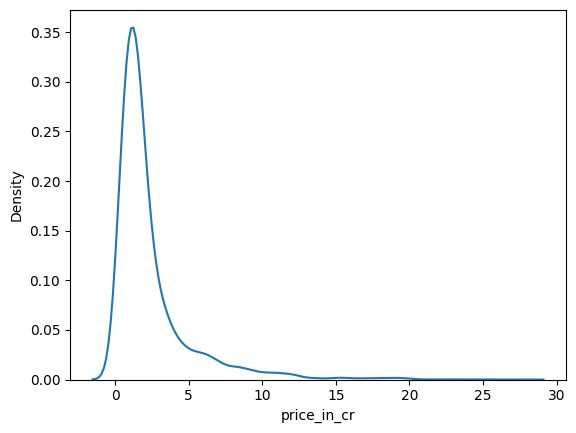

In [ ]:
sns.kdeplot(train_df['price_in_cr'])
plt.show()

In [ ]:
trf = PowerTransformer(method = 'yeo-johnson')

df_trf = pd.DataFrame(trf.fit_transform(train_df), columns = train_df.columns)

df_trf.head()

,ordinal__property_type,remainder__built_up_area,remainder__servant room,remainder__store room,remainder__study room,remainder__bedroom,ordinal__sector,ordinal__furnishing_type,ordinal__floor_category,ordinal__luxury_category,ordinal__agepossession,remainder__bathroom,ordinal__balcony,price_in_cr
0,-0.536363,0.168065,1.345377,-0.315271,-0.480682,0.097505,0.038765,-0.706662,-1.049542,-0.345466,-0.025927,0.436389,1.277644,0.164094
1,-0.536363,-0.548326,-0.743286,3.171875,-0.480682,0.097505,-0.488210,1.373655,-0.021455,0.624364,-0.025927,0.436389,0.385697,-0.244734
2,1.864407,-0.006466,-0.743286,-0.315271,-0.480682,1.054389,-1.647995,-0.706662,0.987718,-1.433765,1.700889,-0.678613,0.385697,-1.626785
3,1.864407,-1.703275,-0.743286,-0.315271,-0.480682,0.097505,-0.138155,-0.706662,0.987718,-1.433765,0.952425,-0.678613,-1.654161,-0.943358
4,-0.536363,0.844369,1.345377,-0.315271,-0.480682,1.054389,1.406503,-0.706662,-1.049542,0.624364,1.700889,1.461801,0.385697,1.393837


In [ ]:
X = df_trf.iloc[:,:-1]
y = df_trf.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

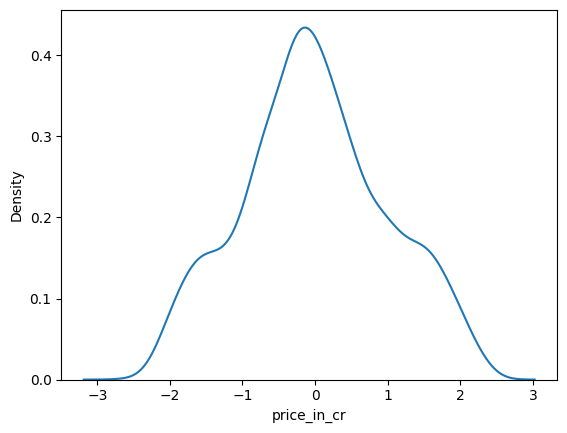

In [ ]:
sns.kdeplot(y_train)
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)

a = r2_score(y_test, y_pred)
e = mean_absolute_error(y_test, y_pred)

print(a,e)

0.8593672377006908 0.2862408423145134


In [ ]:
from sklearn.svm import SVR

svm = SVR().fit(X_train, y_train)

y_pred = svm.predict(X_test)

a = r2_score(y_test, y_pred)
e = mean_absolute_error(y_test, y_pred)

print(a,e)

0.8759391128656018 0.2616143147106397
